In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
from sklearn import datasets
# import datasets 
cancer = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [4]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_standard=cancer_df.copy()
scaled_df_standard=pd.DataFrame(scaler.fit_transform(scaled_df_standard), columns=scaled_df_standard.columns)
scaled_df_standard.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Text(0, 0.5, 'feature2')

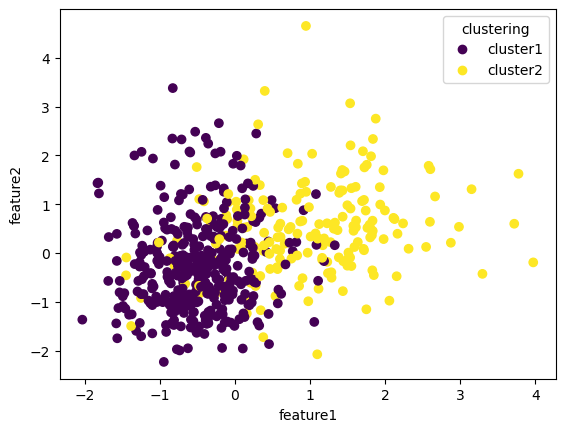

In [19]:
# applying kmeans on the breast cancer dataset 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init = 10, random_state=40)
y_pred = kmeans.fit_predict(scaled_df_standard)
scatter =plt.scatter(scaled_df_standard.iloc[:,0],scaled_df_standard.iloc[:,1],  c=y_pred)
plt.legend(handles=scatter.legend_elements()[0], labels=['cluster1','cluster2'], title="clustering")
plt.xlabel("feature1")
plt.ylabel("feature2")


In [20]:
kmeans.cluster_centers_

array([[-0.48442497, -0.23948977, -0.50066826, -0.47922799, -0.30302374,
        -0.50766196, -0.56671617, -0.57922637, -0.30396101, -0.12545115,
        -0.4270387 , -0.02125791, -0.42787555, -0.40142988, -0.00848542,
        -0.34569618, -0.31677152, -0.38607654, -0.06982168, -0.20642387,
        -0.51730476, -0.25182285, -0.53018015, -0.49893721, -0.3025456 ,
        -0.47291642, -0.51940106, -0.57008917, -0.29713594, -0.30959659],
       [ 0.97397614,  0.48151381,  1.0066346 ,  0.96352718,  0.60925407,
         1.020696  ,  1.13942935,  1.16458212,  0.61113855,  0.25222982,
         0.85859633,  0.04274078,  0.86027888,  0.8071077 ,  0.01706063,
         0.69505052,  0.63689512,  0.77623856,  0.14038222,  0.41503212,
         1.04008365,  0.50631048,  1.06597067,  1.00315418,  0.60829274,
         0.95083725,  1.04429844,  1.14621103,  0.59741617,  0.62246932]])

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_df_standard, kmeans.labels_)

0.3449740051034408

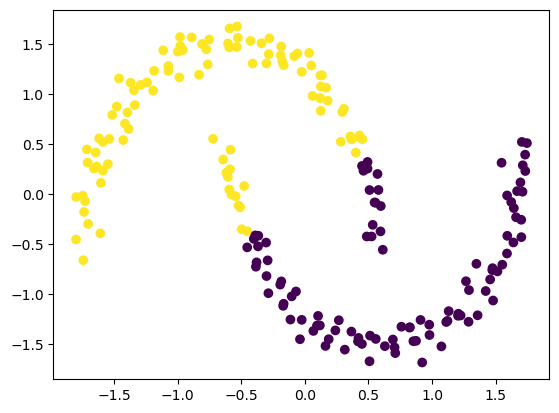

In [23]:
# k-means fails at complex shapes of clusters 
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise = 0.05, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
kmeans = KMeans(n_clusters =2,n_init = 10, random_state=0)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y_pred)


Text(0, 0.5, 'feature2')

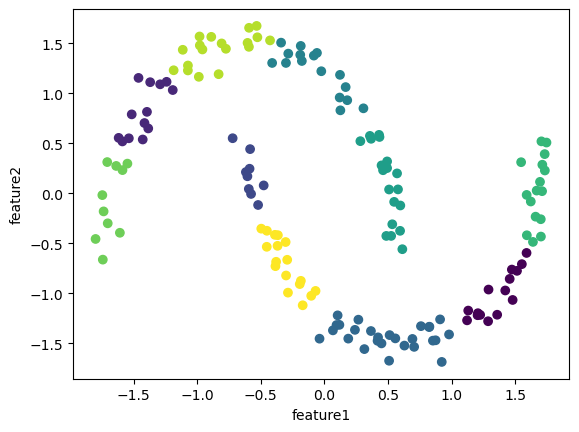

In [25]:
#using kmeans for feature engineering
X_train, X_test , y_train, y_test = train_test_split(X_scaled, y, test_size=0.20,random_state=42)
kmeans = KMeans(n_clusters =10,n_init=10, random_state=0)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_train)
plt.scatter(X_train[:,0],X_train[:,1], c=y_pred)
plt.xlabel('feature1')
plt.ylabel('feature2')


In [30]:
#extracting distance features
dist_features_train = kmeans.transform(X_train)
dist_features_test = kmeans.transform(X_test)


In [31]:
# create and train the model after k-means
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state = 40)
logreg_model.fit(dist_features_train,y_train)
print("training set score is : {:.3f}" .format(logreg_model.score(dist_features_train,y_train)))
print("test set score is : {:.3f}" .format(logreg_model.score(dist_features_test,y_test)))


training set score is : 0.950
test set score is : 0.975


Text(0, 0.5, 'feature2')

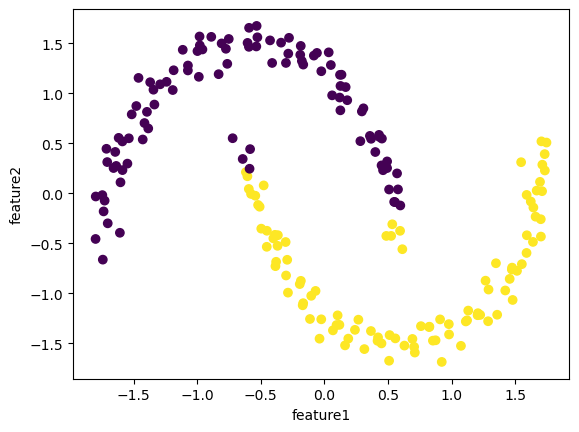

In [28]:
#visualizing the performance
dist_features = kmeans.transform(X_scaled)
y_pred = logreg_model.predict(dist_features)
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y_pred)
plt.xlabel('feature1')
plt.ylabel('feature2')
